In [16]:
import numpy as np
import matplotlib as mp
from matplotlib.animation import FuncAnimation
mp.use('nbagg')
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

2400


<IPython.core.display.Javascript object>


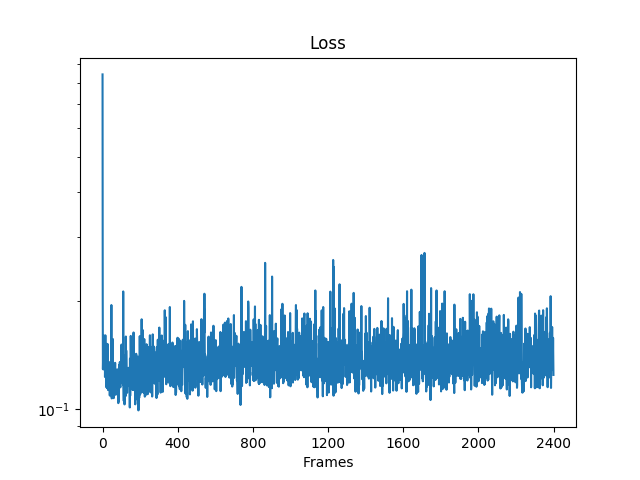

In [17]:
# Load and plot the loss function
loss = np.array([])
for i in range(10):
    loss = np.append(loss, np.load('./01052018_163211/epoch_' + str(i) + '/loss.npy'))
print(len(loss))

#plt.subplot(211)
plt.clf()
plt.semilogy(loss)
plt.xticks(range(0,len(loss)+1,400))
plt.xlabel('Frames')
plt.title('Loss')
plt.show()

<IPython.core.display.Javascript object>


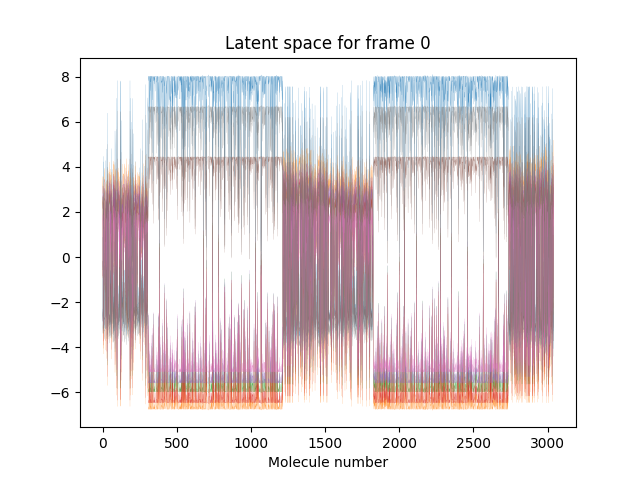

In [18]:
# Load and plot the data

data = np.load('./01052018_163211/epoch_9/3k_run16_\
10us.35fs-DPPC.20-DIPC.60-CHOL.20_chunk_11_outof_29_AE_IncludeTrue_ConvTrue.npy')

squeezed_data = np.squeeze(data)
frame_index = 0
frame = squeezed_data[frame_index]

#plt.subplot(212)
plt.clf()
plt.plot(frame, linewidth=.1)
plt.xlabel('Molecule number')
plt.title('Latent space for frame {}'.format(frame_index))
plt.show()

# Test the Latent space output
1. Visulalize how the latent space output depends on the molecule type. Just realized, you will need to use the other npz file I shared to get the molecule type. The indexing of the molecules is same, irrespective of the chunk or frame. So you can use the same data.
2. The output is saved for different epochs and each epoch has a chunk of data. There should be 30 frames in each chunk and the chunks are ordered. Visualize and track the latent space output of a given molecule across frames. There are frame gaps across chunks but that can be ignored for now.  

In [19]:
def one_hot_decode(xi, axis=None):
    # this doesn't check for erroneous one-hot encoding, nor for
    # entries other than 1 being used as the hot value
    return np.argmax(xi, axis=axis)

In [20]:
labeldata = np.load('data.npz')
labelfeatures = labeldata['features']

# first frame, first bead, all molecules, entries ['CHOL', 'DPPC', 'DIPC']
types = labelfeatures[0,:,0,3:6]

In [21]:
labels = one_hot_decode(types, 1)

In [22]:
indexCHOL = np.where(labels == 0)
indexDPPC = np.where(labels == 1)
indexDIPC = np.where(labels == 2)

In [23]:
def render(ax, data, selection, i):
    ax.set_prop_cycle('color', plt.cm.spectral(np.linspace(0, 1, 8)))
    frame = data[i][selection]
    ax.plot(frame, linewidth=.1)

In [24]:
index_range = (0, len(squeezed_data)-1)

In [25]:
fig, ax = plt.subplots()
render_closed = lambda frame: render(ax, squeezed_data, indexCHOL, frame)
anim = FuncAnimation(fig, render_closed, frames = np.arange(len(squeezed_data)), interval=100, blit=True)
mp.rc('animation', html='html5')
anim

In [33]:
fig, ax = plt.subplots()
render_closed = lambda frame: render(ax, squeezed_data, indexDPPC, frame)
anim = FuncAnimation(fig, render_closed, frames = np.arange(len(squeezed_data)), interval=100, blit=True)
mp.rc('animation', html='html5')
anim

In [32]:
fig, ax = plt.subplots()
render_closed = lambda frame: render(ax, squeezed_data, indexDIPC, frame)
anim = FuncAnimation(fig, render_closed, frames = np.arange(len(squeezed_data)), interval=100, blit=True)
mp.rc('animation', html='html5')
anim

In [38]:
latent_space = np.zeros((0, 3040, 8))
epoch_range = range(10)
chunk_range = range(11, 19)
path_format_string = './01052018_163211' + \
    '/epoch_{}' + \
    '/3k_run16_10us.35fs-DPPC.20-DIPC.60-CHOL.20_chunk_{}_outof_29_AE_IncludeTrue_ConvTrue.npy'
np.load(path_format_string.format(0, 11))
for epoch in epoch_range:
    for chunk in chunk_range:
        new_data = np.load(path_format_string.format(epoch, chunk))
        latent_space = np.append(latent_space, new_data, axis=0)


In [39]:
fig, ax = plt.subplots()
render_closed = lambda frame: render(ax, latent_space, indexDIPC, frame)
anim = FuncAnimation(fig, render_closed, frames = np.arange(len(latent_space)), interval=100, blit=True)
mp.rc('animation', html='html5')
anim
# this'll take a while

In [35]:
# do the same but with indexCHOL, indexDPPC